# Source Spectrum

This example demonstrates how GeoDataFrames (gdfs) and V3_dataframe created by PT3S can be used with matplotlib to depict a source spectrum.

# PT3S Release

In [1]:
#pip install PT3S -U --no-deps

# Necessary packages for this Example

In [2]:
# ...

# Imports

In [3]:
import os
import logging
import pandas as pd
from pandas import Timestamp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

#...

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm

try:
    from PT3S import ncd
except:
    import ncd
#...

In [4]:
import importlib

In [5]:
#importlib.reload(ncd)

# Logging

In [6]:
logger = logging.getLogger()  

logFileName= r"Example7.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Read Model and Results

In [7]:
dbFilename="Example5"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [8]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile,preventPklDump=True,maxRecords=-1)#maxRecords=-1

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example5.db3 exists readable ...
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\Example5.db3 is newer than
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MX1:
+SIR 3S' dbFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.XML is newer than
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MX1:
+SirCalc's xmlFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; dxAndMxHelperFcts.readDxAndMx: running C:\\3S\SIR 3S\SirCalc-90-14-02-10_Potsdam\SirCalc.exe ...
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MXS reading ...
INFO    ; dxWithMx.__init__: Example5: processing dx and mx ...


# Preparing Data

In [9]:
dfKNOT=m.V3_KNOT

In [10]:
dfROHR=m.gdf_ROHR

In [11]:
# Get soure signatures for start and end knot
dfROHR['srcvector_fkKI'] = dfROHR['fkKI'].map(dfKNOT.set_index('tk')['srcvector'])
dfROHR['srcvector_fkKK'] = dfROHR['fkKK'].map(dfKNOT.set_index('tk')['srcvector'])

In [12]:
QM=('STAT',
  'ROHR~*~*~*~QMAV',
  Timestamp('2024-01-09 23:00:00'),
  Timestamp('2024-01-09 23:00:00'))

In [13]:
dfROHR['srcvector_plot'] = np.where(dfROHR[QM] > 0, dfROHR['srcvector_fkKI'], dfROHR['srcvector_fkKK'])

In [14]:
dfROHR = dfROHR[dfROHR['KVR'] != 2.0]

# Plotting

In [15]:
colors = [np.array([255, 0, 0]), np.array([0, 0, 255])]

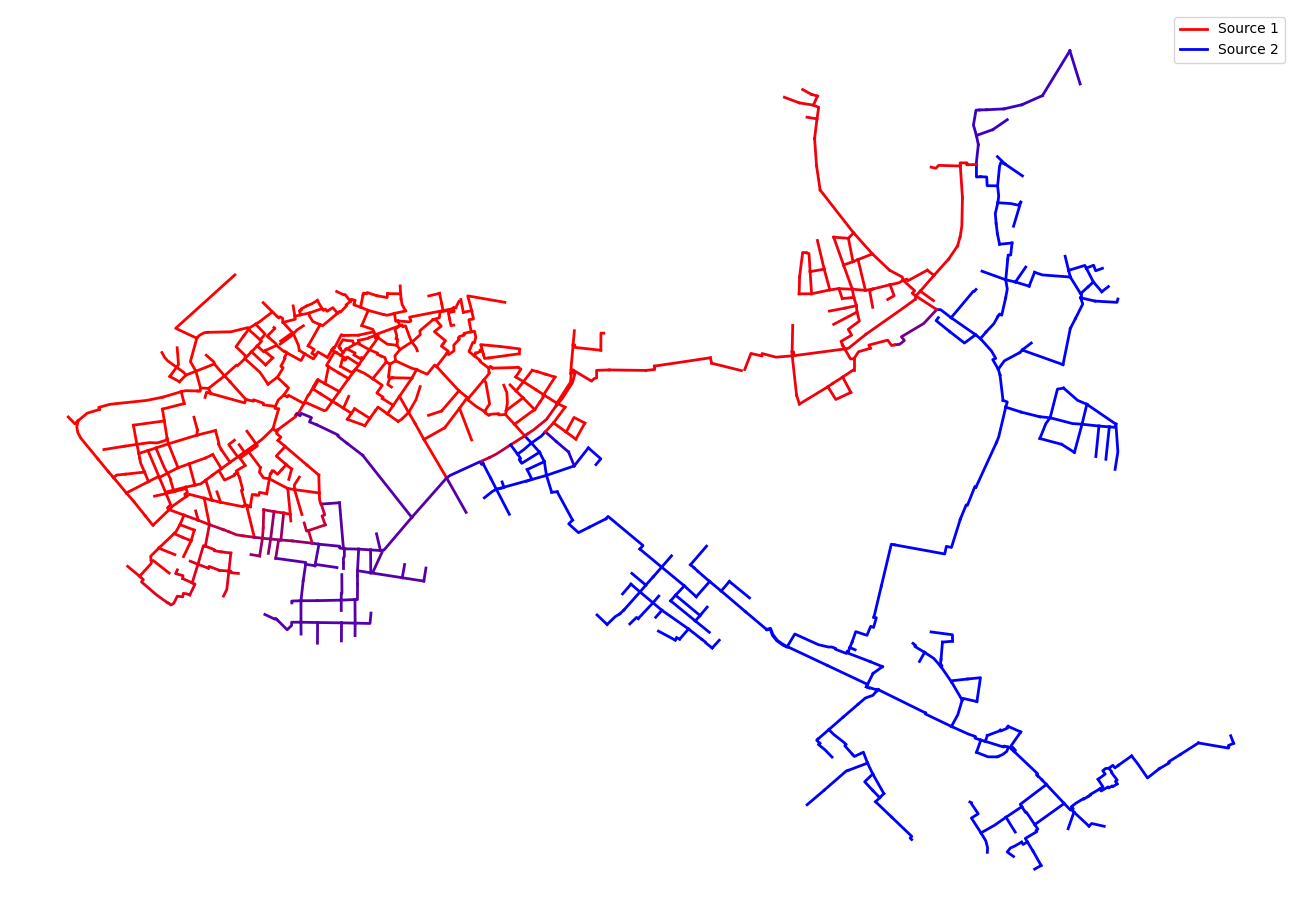

In [16]:
fig, ax = plt.subplots(figsize=Rm.DINA3q)
ncd.plot_src_spectrum(ax, dfROHR,'srcvector_plot', colors)
plt.show()